<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024_06_25_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

K-means clustering is an example of a model that is not trained. So, there is no training set, which is
called an unsupervised model, meaning without labels. K-means clustering is a type of classification
problem. The goal is to put data into groups by something they have in common, meaning put them in
clusters. Example use cases are:

• Recommending videos on TikTok or YouTube
• High credit risk borrowers
• popular social media influencers
• finding spambots




![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/kmeans-clustering.png)



$$\huge \sqrt{(a - b)^2}$$



![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/distance-between-points.png)



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X , y = make_blobs(n_samples=100, centers=3, random_state=0)

**Do we need Y?**

The y values generated by make_blobs represent the true labels of the clusters and are typically used for evaluating the performance of clustering algorithms. However, the KMeans algorithm itself does not require the y values to calculate the clusters. KMeans is an unsupervised learning algorithm, meaning it only needs the input data X to find the clusters.

The y values are useful if you want to assess the quality of the clustering using metrics such as the Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI). These metrics compare the clusters found by the algorithm to the true clusters.

**Gap Statistic**

The Gap Statistic compares the total within-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data. The optimal number of clusters is the one that maximizes the gap statistic.

In [36]:
 X

array([[ 2.63185834,  0.6893649 ],
       [ 0.08080352,  4.69068983],
       [ 3.00251949,  0.74265357],
       [-0.63762777,  4.09104705],
       [-0.07228289,  2.88376939],
       [ 0.62835793,  4.4601363 ],
       [-2.67437267,  2.48006222],
       [-0.57748321,  3.0054335 ],
       [ 2.72756228,  1.3051255 ],
       [ 0.34194798,  3.94104616],
       [ 1.70536064,  4.43277024],
       [ 2.20656076,  5.50616718],
       [ 2.52092996, -0.63858003],
       [ 2.50904929,  5.7731461 ],
       [-2.27165884,  2.09144372],
       [ 3.92282648,  1.80370832],
       [-1.62535654,  2.25440397],
       [ 0.1631238 ,  2.57750473],
       [-1.59514562,  4.63122498],
       [-2.63128735,  2.97004734],
       [-2.17052242,  0.69447911],
       [-1.56618683,  1.74978876],
       [-0.88677249,  1.30092622],
       [ 0.08848433,  2.32299086],
       [ 0.9845149 ,  1.95211539],
       [ 2.18217961,  1.29965302],
       [ 1.28535145,  1.43691285],
       [ 0.89011768,  1.79849015],
       [-1.89608585,

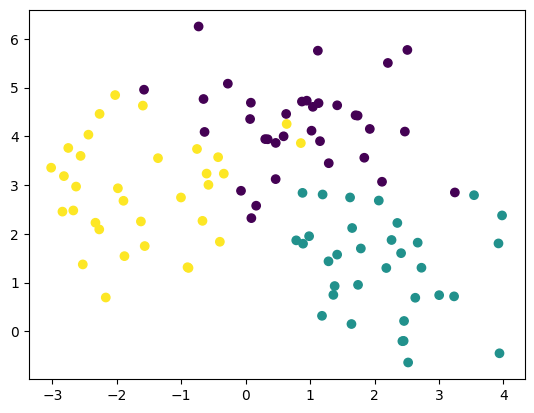

In [37]:
plt.scatter(X[:,0], X[:,1], c=y)

In [38]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)
labels=Kmean.labels_
centers=Kmean.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:

Kmean.predict(np.array([[-2,2]]))

array([0], dtype=int32)

In [40]:
centers

array([[-1.5510878 ,  2.88827923],
       [ 2.2427373 ,  1.30652003],
       [ 0.9801637 ,  4.30837857]])

In [41]:
np.column_stack([X,y,preds])

array([[ 2.63185834,  0.6893649 ,  1.        ,  2.        ],
       [ 0.08080352,  4.69068983,  0.        ,  0.        ],
       [ 3.00251949,  0.74265357,  1.        ,  2.        ],
       [-0.63762777,  4.09104705,  0.        ,  1.        ],
       [-0.07228289,  2.88376939,  0.        ,  1.        ],
       [ 0.62835793,  4.4601363 ,  0.        ,  0.        ],
       [-2.67437267,  2.48006222,  2.        ,  1.        ],
       [-0.57748321,  3.0054335 ,  2.        ,  1.        ],
       [ 2.72756228,  1.3051255 ,  1.        ,  2.        ],
       [ 0.34194798,  3.94104616,  0.        ,  0.        ],
       [ 1.70536064,  4.43277024,  0.        ,  0.        ],
       [ 2.20656076,  5.50616718,  0.        ,  0.        ],
       [ 2.52092996, -0.63858003,  1.        ,  2.        ],
       [ 2.50904929,  5.7731461 ,  0.        ,  0.        ],
       [-2.27165884,  2.09144372,  2.        ,  1.        ],
       [ 3.92282648,  1.80370832,  1.        ,  2.        ],
       [-1.62535654,  2.

In [42]:
Kmean.cluster_centers_

array([[-1.5510878 ,  2.88827923],
       [ 2.2427373 ,  1.30652003],
       [ 0.9801637 ,  4.30837857]])

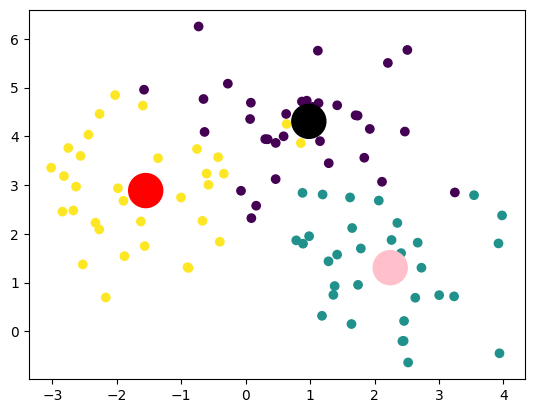

In [43]:
a=Kmean.cluster_centers_[:,0]
b=Kmean.cluster_centers_[:,1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(a,b,c=['red', 'pink', 'black'],s=600)
plt.show()

In [44]:
preds=Kmean.predict(X)

**Adjusted Rand Index (ARI)**

This measures the similarity between the true labels and the cluster assignments. It ranges from -1 to 1, with 1 indicating perfect agreement.

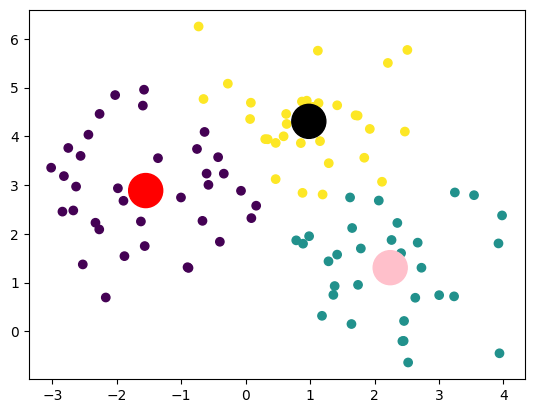

In [45]:
plt.scatter(X[:,0], X[:,1], c=preds)
plt.scatter(a,b,c=['red', 'pink', 'black'],s=600)
plt.show()

In [46]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, preds)

0.7251402595336714

These metrics provide a way to evaluate the clustering performance without needing the cluster labels to match exactly. ARI adjusts for chance clustering, and NMI normalizes the mutual information score to be between 0 and 1.

In [47]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y, preds)
nmi = normalized_mutual_info_score(y, preds)

print(f'Adjusted Rand Index: {ari}')
print(f'Normalized Mutual Information: {nmi}')


Adjusted Rand Index: 0.7251402595336714
Normalized Mutual Information: 0.6929139975030331
